In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
df = pd.read_csv(r'C:\Users\User\Desktop\j\lessons\lesson_5\ads_data.csv')
df.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [8]:
df['full_date'] = pd.to_datetime(df.time, unit = 's')

In [9]:
df.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [10]:
df.shape

(3176714, 13)

In [11]:
df.dtypes

ad_id                             int64
time                              int64
event                            object
date                             object
ad_cost_type                     object
has_video                         int64
client_union_id                   int64
campaign_union_id                 int64
platform                         object
ad_cost                         float64
target_audience_count             int64
user_id                           int64
full_date                datetime64[ns]
dtype: object

In [16]:
df['date'] = pd.to_datetime(df.date)
df.dtypes

ad_id                             int64
time                              int64
event                            object
date                     datetime64[ns]
ad_cost_type                     object
has_video                         int64
client_union_id                   int64
campaign_union_id                 int64
platform                         object
ad_cost                         float64
target_audience_count             int64
user_id                           int64
full_date                datetime64[ns]
dtype: object

In [17]:
# 1. Retrieve statistics by day: 
# Calculate the total number of events, views, clicks, unique ads, and unique campaigns per day.

<AxesSubplot:xlabel='date'>

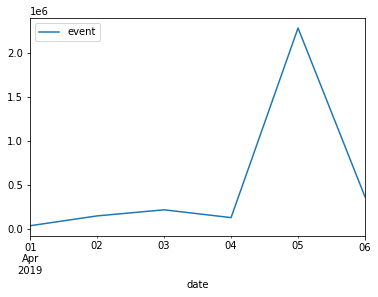

In [24]:
# total number of events per day
df.groupby('date') \
.agg({'event':'count'}).plot()

In [32]:
# total number of views and clicks per day
df.groupby(['date', 'event'], as_index = False) \
.agg({'ad_id':'count'}) \
.pivot(index='date', columns='event', values='ad_id').reset_index()

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [37]:
# total number of unique ads per day
df.groupby('date', as_index = False) \
.agg({'ad_id' : pd.Series.nunique})

,date,ad_id
0,2019-04-01,49
1,2019-04-02,146
2,2019-04-03,179
3,2019-04-04,150
4,2019-04-05,131
5,2019-04-06,61


In [38]:
# total number of unique campaigns per day
df.groupby('date', as_index = False) \
.agg({'campaign_union_id' : pd.Series.nunique})

,date,campaign_union_id
0,2019-04-01,49
1,2019-04-02,146
2,2019-04-03,177
3,2019-04-04,147
4,2019-04-05,130
5,2019-04-06,60


In [48]:
# 2. Investigate the spike on 2019-04-05: Determine which events experienced an increase. 
# Did this increase occur across all ads or only specific ones?
df[df.date == '2019-04-05'] \
.groupby('ad_id') \
.agg({'event':'count'}) \
.sort_values('event', ascending = False).head()

,event
ad_id,
112583,2166611
29927,27186
44635,8268
46583,7327
44956,5656


In [51]:
df.query('ad_id == 112583') \
.groupby('date') \
.agg({'event':'count'})

,event
date,
2019-04-05,2166611
2019-04-06,348613


In [55]:
df.query('ad_id == 112583').head(1).client_union_id

527124    111818
Name: client_union_id, dtype: int64

In [60]:
# 3. Find the top 10 ads by CTR (Click-Through Rate) of all time. CTR is the ratio of clicks to views. 
# Is there a difference between the average and median CTR of the ads in our data?

ads_data = df.groupby(['ad_id', 'event'], as_index = False) \
.agg({'time':'count'}) \
.pivot(index='ad_id', columns='event', values='time').reset_index()
ads_data

event,ad_id,click,view
0,3,9.0,490.0
1,2132,1.0,95.0
2,2276,2.0,1454.0
3,2475,NaN,132.0
4,2643,3.0,286.0
...,...,...,...
350,121941,1.0,640.0
351,121943,15.0,1722.0
352,122042,1.0,155.0
353,122063,1.0,260.0


In [63]:
ads_data = ads_data.assign(ctr = ads_data.click / ads_data.view, ctr_per = 100 * ads_data.click / ads_data.view)
ads_data.sort_values('ctr', ascending = False).head(10)

event,ad_id,click,view,ctr,ctr_per
289,112583,580436.0,1934788.0,0.300000,29.999979
324,119450,258.0,1254.0,0.205742,20.574163
125,38575,43.0,257.0,0.167315,16.731518
144,40968,29.0,217.0,0.133641,13.364055
207,45642,42.0,344.0,0.122093,12.209302
283,110924,11.0,95.0,0.115789,11.578947
194,45043,28.0,245.0,0.114286,11.428571
96,35034,112.0,997.0,0.112337,11.233701
5,4585,53.0,476.0,0.111345,11.134454
328,120347,236.0,2168.0,0.108856,10.885609


In [65]:
ads_data.ctr.mean(), ads_data.ctr.median()

(0.020628096080757954, 0.010753240746688594)

<AxesSubplot:xlabel='ctr', ylabel='Count'>

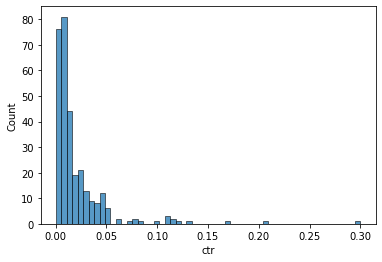

In [66]:
sns.histplot(ads_data.ctr)

In [67]:
# It seems that there is a bug in our logs where ads have clicks but no views. 
# How many ads are affected by this issue, and are there any patterns? Does this problem occur across all platforms?

In [68]:
ads_data = ads_data.fillna(0)

In [73]:
ad_ids_bug = ads_data.query('click == 0').ad_id

In [77]:
df[df.ad_id.isin(ad_ids_bug)] \
.groupby('platform', as_index = False) \
.agg({'date':'count'}) \
.sort_values('date', ascending = False)

,platform,date
0,android,4906
1,ios,3075
2,web,1988


In [78]:
df \
.groupby('platform', as_index = False) \
.agg({'date':'count'}) \
.sort_values('date', ascending = False)

,platform,date
0,android,1588211
1,ios,953078
2,web,635425


In [79]:
# 5. What is the 95th percentile CTR for all ads on 2019-04-04?

In [86]:
df_04_04 = df[df.date == '2019-04-04'].groupby(['ad_id', 'event'], as_index = False) \
.agg({'time':'count'}) \
.pivot(index='ad_id', columns='event', values='time').reset_index() \
.fillna(0)

In [89]:
df_04_04['ctr'] = df_04_04.click / df_04_04.view
df_04_04[df_04_04.click > 0].ctr.quantile(q=0.95)

0.10211538461538454

In [97]:
# 6. For the financial report, we need to calculate our earnings per day. On which day did we earn the most? 
# And the least? 
# We charge customers for CPC (Cost Per Click) ads when a click occurs, and for CPM (Cost Per Mille) ads, 
# we charge for each view at a rate of 200 rubles per 1000 views.

In [100]:
df[(df.ad_cost_type == 'CPC') & (df.event == 'click')].ad_cost.sum()

84810.0

In [101]:
df[(df.ad_cost_type == 'CPM') & (df.event == 'view')].ad_cost.sum() / 1000

497090.6778000003

In [112]:
df_cost_cpc = df[(df.ad_cost_type == 'CPC') & (df.event == 'click')].groupby('date', as_index = False).agg({'ad_cost':'sum'}) 
df_cost_cpc

,date,ad_cost
0,2019-04-01,7036.9
1,2019-04-02,7663.7
2,2019-04-03,38597.2
3,2019-04-04,26878.0
4,2019-04-05,4381.2
5,2019-04-06,253.0


In [111]:
df_cost_cpm = df[(df.ad_cost_type == 'CPM') & (df.event == 'view')].groupby('date', as_index = False).agg({'ad_cost':'sum'}) 
df_cost_cpm.ad_cost= df_cost_cpm.ad_cost / 1000
df_cost_cpm

,date,ad_cost
0,2019-04-01,6122.8123
1,2019-04-02,26173.3051
2,2019-04-03,34612.3170
3,2019-04-04,19416.3568
4,2019-04-05,354178.5490
5,2019-04-06,56587.3376


In [117]:
df_cost_cpm['total'] = df_cost_cpc['ad_cost'] + df_cost_cpm['ad_cost']
df_cost_cpm.sort_values('total')

,date,ad_cost,total
0,2019-04-01,6122.8123,13159.7123
1,2019-04-02,26173.3051,33837.0051
3,2019-04-04,19416.3568,46294.3568
5,2019-04-06,56587.3376,56840.3376
2,2019-04-03,34612.3170,73209.5170
4,2019-04-05,354178.5490,358559.7490


In [118]:
# 8. Are there any ads where the click occurred before the view?

In [122]:
df.groupby(['ad_id', 'event'], as_index = False).agg({'time':'min'}) \
.pivot(index = 'ad_id', columns = 'event', values = 'time').reset_index() \
.query('click < view')

event,ad_id,click,view
27,16548,1.554336e+09,1.554336e+09
81,30939,1.554165e+09,1.554173e+09
138,40464,1.554164e+09,1.554164e+09
158,42007,1.554423e+09,1.554423e+09
185,44543,1.554336e+09,1.554337e+09
201,45436,1.554336e+09,1.554336e+09
324,119450,1.554336e+09,1.554336e+09
